# Part 5: Naive Collaborative filtering

Design a naive collaborative lter to predict the ratings of the
movies in the MovieLens dataset and evaluate it's performance using 10-fold
cross validation.

* An important thing to note about the naive collaborative filter is that there is no notion of training. So, split the dataset into 10 pairs of train set and test set and for each pair predict the ratings of the movies in the test set using the prediction function (no model fitting required). Then compute the RMSE for this fold and repeat the procedure for all the 10 folds. The average RMSE is computed by averaging the RMSE across all the 10 folds.

## Importing libraries

In [1]:
from surprise import BaselineOnly

from surprise import Dataset

from surprise import Reader

from surprise.model_selection import cross_validate

import pandas as pd

import numpy as np

import matplotlib.pyplot as plt

import surprise

from surprise import accuracy

from surprise.model_selection import KFold

from math import sqrt

import sklearn.metrics

import sys, os

## Creating data

In [2]:
ratings = pd.read_csv('ratings.csv')

if not os.path.exists('results/Q30-34'):

    os.makedirs('results/Q30-34')

reader = Reader(rating_scale=(1, 5))

data = Dataset.load_from_df(ratings[['userId', 'movieId', 'rating']], reader)

ratings = ratings.as_matrix()


C:\Users\Omkar Mehta\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  # This is added back by InteractiveShellApp.init_path()


## Plot function to get performance

In [3]:
def plot(k,metric_v,metric_name,type_data):

    x = range(2,k+2,2)

    plt.plot(x,metric_v)

    plt.xlabel("K")

    plt.ylabel("Average "+metric_name)

    plt.title("Average "+metric_name+" for k = "+str(k)+" for the "+type_data+" dataset")

    plt.savefig("Naive: Average "+metric_name+" for k = "+str(k)+" for the "+type_data+" dataset"+".png")

    plt.save()
    
    plt.close()

## Popular trimmed testset

In this trimming, we trim the test set to contain
movies that has received more than 2 ratings. To be specific, if a movie
in the test set has received less than or equal to 2 ratings in the entire
dataset then we delete that movie from the test set and do not predict the
rating of that movie using the trained filter.

In [4]:
def popular_trim(array,dict):

    result = list()

    for i in range(0,len(array)):

        if(dict[array[i][1]] > 2):

            result.append(array[i])

    return result


## Unpopular trimmed testset

In this trimming, we trim the test set to
contain movies that has received less than or equal to 2 ratings. To be
specific, if a movie in the test set has received more than 2 ratings in
the entire dataset then we delete that movie from the test set and do not
predict the rating of that movie using the trained filter.

In [6]:
def unpop_trim(array,dict):

    result = list()

    for i in range(0,len(array)):
        if(dict[array[i][1]] <= 2):
            result.append(array[i])
    return result

## High variance trimmed testset

In this trimming, we trim the test set to
contain movies that has variance (of the rating values received) of at least
2 and has received at least 5 ratings in the entire dataset. To be specific,
if a movie has variance less than 2 or has received less than 5 ratings in
the entire dataset then we delete that movie from the test set and do not
predict the rating of that movie using the trained filter.

In [7]:
def high_var(array,dict,variance, map):

    result = list()

    for i in range(0,len(array)):

        if(dict[array[i][1]] > 5 and variance[map[array[i][1]]] >= 2):

            result.append(array[i])

    return result

## Dictionary of movieID as keys and Count as values

In [8]:
q3 = dict()

for i in range(0,ratings.shape[0]):

    if(ratings[i][1] not in q3):

        q3[ratings[i][1]] = 1

    else:

        q3[ratings[i][1]] = q3[ratings[i][1]]+1

## Dictionary of movieID as keys and index_numbers from 0 as values

In [9]:
counter = 0

map_n = dict()

for i in range(0,ratings.shape[0]):

    if(ratings[i][1] not in map_n):

        map_n[ratings[i][1]] = counter

        counter = counter +1

## Ratings matrix 

In [18]:
npdata = np.zeros((650,9724))

npdata[:] = np.nan

for i in range(0,ratings.shape[0]):

    npdata[ratings[i][0].astype(int)][map_n[ratings[i][1]]] = ratings[i][2]



## Mean and Variance matrix

In [19]:
mean = np.nanmean(npdata,axis =1)

q5 = np.square(np.nanstd(npdata,axis = 0))


C:\Users\Omkar Mehta\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: Mean of empty slice
  """Entry point for launching an IPython kernel.


## Predictions of test set function

In [36]:

def test(testset,mean):

    pred = list()

    for i in range(0,len(testset)):

        pred.append(mean[int(testset[0][0])])

    return pred

## Using Naive collaborative filtering

In [42]:
res_test_mae = list()

res_test_rmse = list()

res_pop = list()

res_unpop = list()

res_high = list()

kf = KFold(n_splits=10)

temp_t_n = list()

temp_t_r = list()

temp_p = list()

temp_u = list()

temp_h = list()



for trainset, testset in kf.split(data):

    pop_test = popular_trim(testset,q3)

    unpop_test = unpop_trim(testset,q3)

    high_test = high_var(testset,q3,q5,map_n)

    predictions = test(testset,mean)

    temp_t_r.append(sqrt(sklearn.metrics.mean_squared_error(np.array(testset)[:,2],predictions)))

    temp_t_n.append(sklearn.metrics.mean_squared_error(np.array(testset)[:,2],predictions))

    predictions = test(pop_test,mean)

    temp_p.append(sqrt(sklearn.metrics.mean_squared_error(np.array(pop_test)[:,2],predictions)))

    predictions = test(unpop_test,mean)

    temp_u.append(sqrt(sklearn.metrics.mean_squared_error(np.array(unpop_test)[:,2],predictions)))

    predictions = test(high_test,mean)

    temp_h.append(sqrt(sklearn.metrics.mean_squared_error(np.array(high_test)[:,2],predictions)))

res_test_mae.append(np.average(temp_t_n))    

res_test_rmse.append(np.average(temp_t_r))

res_pop.append(np.average(temp_p))

res_unpop.append(np.average(temp_u))

res_high.append(np.average(temp_h))



In [43]:
for trainset, testset in kf.split(data):
    print(mean[int(testset[0][0])])
len(testset)

3.9774266365688487
3.4763313609467454
3.5444444444444443
3.020175438596491
2.6420500403551253
3.5405405405405403
3.945945945945946
4.02076124567474
3.220472440944882
2.761827079934747


10083

In [44]:
print("For full test set:")

print("RMSE = " + str(res_test_rmse[0]))

print()

print("For popular test set:")

print("RMSE = " + str(res_pop[0]))

print()

print("For unpopular test set:")

print("RMSE = " + str(res_unpop[0]))

print()

print("For high variance test set:")

print("RMSE = " + str(res_high[0]))

print()




For full test set:
RMSE = 1.158145938294227

For popular test set:
RMSE = 1.1507637692289758

For unpopular test set:
RMSE = 1.1801425028145975

For high variance test set:
RMSE = 1.639637521628838



## Performance evaluation using ROC curve

Plot the ROC curves (threshold = 3) for the k-NN, NNMF, and
MF with bias based collaborative filters in the same figure. Use the figure to
compare the performance of the filters in predicting the ratings of the movies.

In [45]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import auc

In [46]:
# use the best value of k
k_k = 23
k_n = 17
k_s = 12



## Predictions for KNN, NMF, MF

In [47]:
kf = KFold(n_splits=10)
y = list()
for trainset, testset in kf.split(data):
    knn = surprise.prediction_algorithms.knns.KNNBasic(k=k_k, min_k=1, sim_options={'name': 'pearson'})
    nmf = surprise.prediction_algorithms.matrix_factorization.NMF(n_factors = k_n)
    svd = surprise.prediction_algorithms.matrix_factorization.SVD(n_factors = k_s)
    knn.fit(trainset)
    nmf.fit(trainset)
    svd.fit(trainset)
    predictions_k = knn.test(testset)
    predictions_n = nmf.test(testset)
    predictions_s = svd.test(testset)
    y = testset
    break

Computing the pearson similarity matrix...
Done computing similarity matrix.


In [48]:
pred_k=list()
for uid, iid, true_r, est, _ in predictions_k:
    pred_k.append(est)

pred_n=list()
for uid, iid, true_r, est, _ in predictions_n:
    pred_n.append(est)

pred_s=list()
for uid, iid, true_r, est, _ in predictions_s:
    pred_s.append(est)

## Actual list of testset

In [49]:
actual = list(np.array(y)[:,2])

In [50]:
testset=list(map(lambda x: 1 if x>3 else 0,actual))

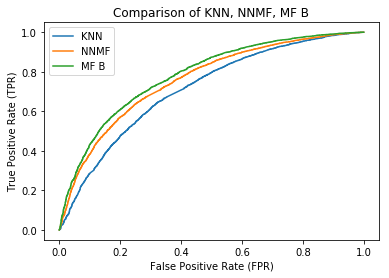

In [52]:
x,y, _ = roc_curve(list(testset), pred_k) 
plt.plot(x, y, label="KNN")

x,y, _ = roc_curve(list(testset), pred_n)
plt.plot(x, y, label="NNMF")

x,y, _ = roc_curve(list(testset), pred_s)
plt.plot(x, y, label="MF B")

plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title("Comparison of KNN, NNMF, MF B")
plt.legend()
plt.savefig("ROC curve for KNN, NMF,MF.png")

plt.show()
plt.close()

**The area under the curve signifies the accuracy of the model, so, more the AUC, more the
accuracy. As we can see from the plot, the maximum AUC is for the MF with bias based filter,
which means that, it has the highest accuracy. Also, we can see that it always has the maximum
TPR. We can further prove this result by observing the average RMSE values for the three
models; the MF with bias model has the minimum average RMSE, further proving that it has the
best performance in predicting the ratings of the movies.**